# Аналитика данных. Домашнее задание 2. Коломыцева Анна

In [2]:
# импортируем библиотеки
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# считываем данные в dataframe, используя шаблон адреса url_template, перебирая года в цикле
tennis_df = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1968.csv')
url_template = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{}.csv'

for year in range(1969, 2024):
    df_to_append = pd.read_csv(url_template.format(year))
    tennis_df = pd.concat([tennis_df, df_to_append])

In [4]:
display(tennis_df.sample(5))

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
3045,1991-D006,Davis Cup WG PO: GBR vs AUT,Grass,4.0,D,19910920,2,101783,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,324.0,67.0,38.0,768.0
2954,2005-D007,Davis Cup WG R1: ROU vs BLR,Clay,4.0,D,20050304,2,102318,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24.0,1210.0,168.0,266.0
180,1990-580,Australian Open,Hard,128.0,G,19900115,57,101036,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,613.0,64.0,325.0
556,1983-321,Stuttgart Outdoor,Clay,32.0,A,19830711,28,100579,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN
409,2005-321,Stuttgart,Clay,48.0,A,20050718,13,102783,NaN,NaN,...,50.0,25.0,18.0,11.0,7.0,11.0,89.0,450.0,122.0,353.0


In [5]:
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191920 entries, 0 to 2985
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          191920 non-null  object 
 1   tourney_name        191920 non-null  object 
 2   surface             188930 non-null  object 
 3   draw_size           191085 non-null  float64
 4   tourney_level       191920 non-null  object 
 5   tourney_date        191920 non-null  int64  
 6   match_num           191920 non-null  int64  
 7   winner_id           191920 non-null  int64  
 8   winner_seed         70926 non-null   float64
 9   winner_entry        16743 non-null   object 
 10  winner_name         191920 non-null  object 
 11  winner_hand         191910 non-null  object 
 12  winner_ht           175012 non-null  float64
 13  winner_ioc          191912 non-null  object 
 14  winner_age          190610 non-null  float64
 15  loser_id            191920 non-null 

In [6]:
tennis_df.describe(include='all')

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,191920,191920,188930,191085.000000,191920,1.919200e+05,191920.000000,191920.000000,70926.000000,16743,...,95034.000000,95034.000000,95034.000000,95035.000000,95034.000000,95034.000000,156162.000000,108939.000000,147790.000000,107310.000000
unique,8303,4098,4,NaN,5,NaN,NaN,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-520,Roland Garros,Hard,NaN,A,NaN,NaN,NaN,NaN,Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,127,7064,76518,NaN,126189,NaN,NaN,NaN,NaN,10397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,53.088479,NaN,1.993711e+07,79.398656,104499.014537,6.308279,NaN,...,48.089421,31.962361,14.972936,12.206229,4.808942,8.730570,75.262266,1375.872589,112.914778,865.961504
std,NaN,NaN,NaN,36.645414,NaN,1.581156e+05,111.963129,13664.799449,5.547887,NaN,...,19.378619,14.447415,7.207299,4.131171,3.275134,4.132557,121.010337,1729.710794,162.623743,993.834468
min,NaN,NaN,NaN,2.000000,NaN,1.967123e+07,1.000000,100001.000000,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,32.000000,NaN,1.980051e+07,11.000000,100417.000000,2.000000,NaN,...,34.000000,22.000000,10.000000,9.000000,2.000000,6.000000,17.000000,494.000000,37.000000,365.000000
50%,NaN,NaN,NaN,32.000000,NaN,1.993052e+07,25.000000,101733.000000,5.000000,NaN,...,45.000000,30.000000,14.000000,11.000000,4.000000,8.000000,45.000000,850.000000,70.000000,635.000000
75%,NaN,NaN,NaN,64.000000,NaN,2.007032e+07,94.000000,103990.000000,8.000000,NaN,...,58.000000,40.000000,19.000000,15.000000,7.000000,11.000000,86.000000,1540.000000,118.000000,1015.000000


In [7]:
# найдем и удалим дубликаты
def dedupp(df):
    dupl_columns = list(df.columns)

    mask = df.duplicated(subset=dupl_columns)
    df_duplicates = df[mask]
    print(f'Число найденных дубликатов: {df_duplicates.shape[0]}')

    dedupped = df.drop_duplicates(subset=dupl_columns)
    print(f'Результирующее число записей: {dedupped.shape[0]}')
    return dedupped

tennis_dedupped = dedupp(tennis_df)

Число найденных дубликатов: 0
Результирующее число записей: 191920


явные дубликаты отсутствуют

winner_entry          91.276053
loser_entry           85.189662
loser_seed            81.190600
winner_seed           63.043977
minutes               51.924239
w_1stIn               50.482493
l_ace                 50.482493
w_2ndWon              50.482493
w_1stWon              50.482493
w_bpFaced             50.482493
w_svpt                50.482493
w_df                  50.482493
l_1stIn               50.482493
l_svpt                50.482493
w_bpSaved             50.482493
l_1stWon              50.482493
l_2ndWon              50.482493
l_bpSaved             50.482493
l_bpFaced             50.482493
l_df                  50.481972
w_ace                 50.481972
l_SvGms               50.481972
w_SvGms               50.481972
loser_rank_points     44.086078
winner_rank_points    43.237286
loser_rank            22.993956
winner_rank           18.631722
loser_ht              15.454356
winner_ht              8.809921
loser_age              2.424969
surface                1.557941
winner_a

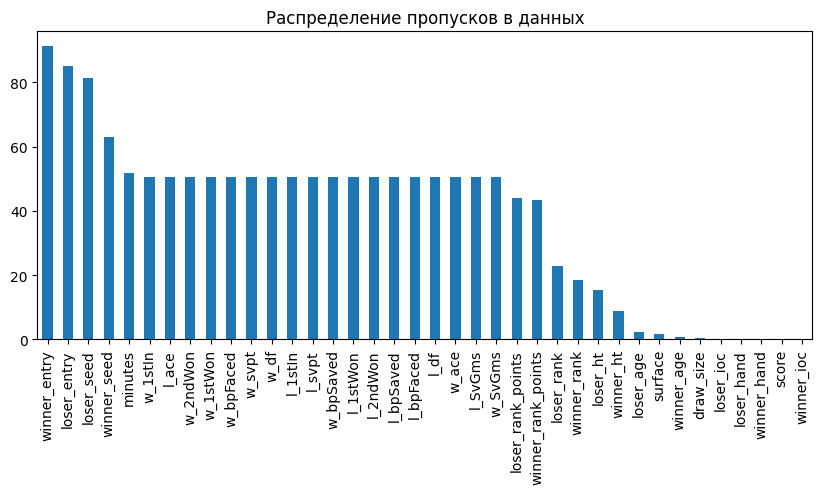

In [8]:
# рассмотрим распределение пропущенных значений
cols_null_percent = tennis_dedupped.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

In [9]:
# создаём копию исходной таблицы
#tennis_new = tennis_dedupped.copy()

# отбрасываем столбцы с числом пропусков более 60%
#n = tennis_new.shape[0] #число строк в таблице
#thresh = n*0.4
#tennis_new = tennis_new.dropna(thresh=thresh, axis=1)

In [10]:
#tennis_new.info()

## Задача 1а:
узнать, как много значит ранг игрока в теннисе, проверить следующее утверждение:

Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе)

In [11]:
df_1a = tennis_df[['tourney_id', 'winner_id', 'winner_rank', 'loser_id', 'loser_rank', 'match_num']].dropna()
display(df_1a.sample(5))

,tourney_id,winner_id,winner_rank,loser_id,loser_rank,match_num
1613,1990-439,101772,74.0,101117,93.0,27
2378,2004-560,102905,97.0,104166,109.0,50
252,1979-301,100259,45.0,100230,271.0,1
1124,1984-339,100551,75.0,100568,133.0,13
164,1987-303,100809,210.0,101332,148.0,10


**Для проверки утверждения 1а:**
- Сформируем две выборки игроков: первая выборка - игроки с рангом, отличающимся более чем на 20 позиций от противника, вторая - игроки с близким рангом к противнику.
- Вычислим отклонение фактического количества побед от ожидаемого для каждого игрока.
- Если в первой выборке (ранг выше более чем на 20 позиций) среднее отклонение значительно выше, чем во второй выборке, то это подтверждает гипотезу о большей вероятности выигрыша у игроков с более высоким рангом.

$H_0$: среднее отклонение фактического количества побед от ожидаемого в первой выборке не больше, чем во второй<br>
$H_a$: Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью, т.е. при  winner_rank > loser_rank+20 среднее отклонение выше<br>
Пусть уровень значимости $\alpha = 0.05$

In [12]:
# две выборки игроков: первая выборка - игроки с рангом, отличающимся более чем на 20 позиций от противника
df_1a['higher_rank_win'] = (df_1a['winner_rank'] - df_1a['loser_rank']) > 20
# фактическое количество побед для каждого игрока в выборках
more20 = (df_1a[df_1a['higher_rank_win']==True]
.groupby(['winner_id'])
.agg({'match_num':'count'})
.reset_index()
.rename(columns={'match_num': 'victory_count', 'winner_id': 'id'}))
# вторая - игроки с близким рангом к противнику
less20 = (df_1a[df_1a['higher_rank_win']==False]
.groupby(['winner_id'])
.agg({'match_num':'count'})
.reset_index()
.rename(columns={'match_num': 'victory_count', 'winner_id': 'id'}))

In [13]:
# фактическое количество поражений для каждого игрока в выборках
loser_more20 = (df_1a[df_1a['higher_rank_win']==True]
.groupby(['loser_id'])
.agg({'match_num':'count'})
.reset_index()
.rename(columns={'match_num': 'loss_count', 'loser_id': 'id'}))
# вторая - игроки с близким рангом к противнику
loser_less20 = (df_1a[df_1a['higher_rank_win']==False]
.groupby(['loser_id'])
.agg({'match_num':'count'})
.reset_index()
.rename(columns={'match_num': 'loss_count', 'loser_id': 'id'}))

# объединим таблицы
more20 = more20.merge(loser_more20, on='id')
less20 = less20.merge(loser_less20, on='id')

In [14]:
# всего игр сыграно каждым игроком
more20['all_games'] = (more20['victory_count'] + more20['loss_count'])
less20['all_games'] = (less20['victory_count'] + less20['loss_count'])

# ожидаемое количество побед для каждого игрока
more20['victory_expected'] = 0.5 * (more20['victory_count'] + more20['loss_count'])
less20['victory_expected'] = 0.5 * (less20['victory_count'] + less20['loss_count'])

# отклонение фактического количества побед от ожидаемого для каждого игрока
more20['deviation'] = more20['victory_expected'] - more20['victory_count']
less20['deviation'] = less20['victory_expected'] - less20['victory_count']

display(more20.sample(5), less20.sample(5))

,id,victory_count,loss_count,all_games,victory_expected,deviation
1490,109303,1,1,2,1.0,0.0
1430,106071,41,44,85,42.5,1.5
1561,133018,1,3,4,2.0,1.0
1570,144719,24,26,50,25.0,1.0
828,102339,6,2,8,4.0,-2.0


,id,victory_count,loss_count,all_games,victory_expected,deviation
406,100792,7,9,16,8.0,1.0
1579,105239,1,5,6,3.0,2.0
1729,106252,1,2,3,1.5,0.5
1659,105806,11,30,41,20.5,9.5
286,100523,3,19,22,11.0,8.0


**Проверим данные - столбец deviation - на нормальность**

In [15]:
from scipy.stats import shapiro # тест на нормальность распределения Шапиро
from scipy.stats import normaltest # тест на нормальность распределения Деагостино
from scipy.stats import anderson # тест Андерсона-Дарлинга
# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson

# функция проверки на нормальность
def normal(data, alpha = 0.05):
    H0 = 'Данные распределены нормально'
    Ha = 'Данные не распределены нормально (мы отвергаем H0)'

    _, p2 = normaltest(data)
    #normaltest возвращает двустороннюю вероятность для проверки гипотезы
    print('Тест Д’Агостино p=%.3f' % p2)

    if data.shape[0] < 5000:
        _, p1 = shapiro(data)
        print('Тест Шапиро-Уилка p=%.3f' % p1)
        # Интерпретация
        if p1 > alpha and p2 > alpha/2:
            print(H0)
            return True
        else:
            print(Ha)
            return False
    else: # Для N > 5000 значение p в тесте Шапиро может быть неточным. Используем тест Андерсона Дарлинга.
        p1, crit_values, signif_level = anderson(data)
        # Критическое значение для нашего α равно:
        critical_value = crit_values[signif_level.tolist().index(alpha*100)]
        print('Тест Андерсона-Дарлинга p=%.3f' % p1, 'critical_value=%.3f' % critical_value)
        # Если тестовая статистика p1 не превышает критического значения, результаты не являются значимыми, не отвергаем нулевую гипотезу.
        # Интерпретация
        if p1 <= critical_value and p2 > alpha/2:
            print(H0)
            return True
        else:
            print(Ha)
            return False

print(normal(more20['deviation']))
print(normal(less20['deviation']))

Тест Д’Агостино p=0.000
Тест Шапиро-Уилка p=0.000
Данные не распределены нормально (мы отвергаем H0)
False
Тест Д’Агостино p=0.000
Тест Шапиро-Уилка p=0.000
Данные не распределены нормально (мы отвергаем H0)
False


Используем **U-критерий Манна-Уитни**, который применяется для оценки различий между двумя независимыми выборками по уровню какого-либо количественного признака. U-критерий Манна-Уитни является непараметрическим критерием, поэтому не требует наличия нормального распределения сравниваемых совокупностей; подходит для сравнения малых выборок.
Этот тест позволяет провести одностороннюю проверку гипотезы о том, что среднее значение в одной выборке больше среднего значения в другой выборке.

https://medstatistic.ru/methods/methods2.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

Параметр alternative:
- 'two-sided' используется, если вы хотите проверить, отличаются ли выборки вообще (в любом направлении).
- 'less' используется, если вы предполагаете, что медиана первой выборки меньше медианы второй.
- 'greater' используется, если вы предполагаете, что медиана первой выборки больше медианы второй.

In [16]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(more20['deviation'], less20['deviation'], alternative='greater')
alpha = 0.05
# Вывод результатов
print(f'U-статистика: {stat}')
print(f'p-значение: {p}')

# Формулировка гипотез
H0 = 'Среднее отклонений для more20 не больше медианы для выборки less20'
H1 = 'Среднее отклонений для more20 больше медианы для выборки less20'
print(f'Нулевая гипотеза:{H0}')
print(f'Альтернативная гипотеза:{H1}')

# Сравнение p-значения с уровнем значимости
if p < alpha:
    print(f'Отвергаем нулевую гипотезу: {H0} при a = {alpha}.')
    print(f'Принимаем альтернативную гипотезу: {H1} при a = {alpha}.')
else:
    print(f'Не отвергаем нулевую гипотезу: {H0} при a = {alpha}.')

U-статистика: 842044.5
p-значение: 1.0
Нулевая гипотеза:Среднее отклонений для more20 не больше медианы для выборки less20
Альтернативная гипотеза:Среднее отклонений для more20 больше медианы для выборки less20
Не отвергаем нулевую гипотезу: Среднее отклонений для more20 не больше медианы для выборки less20 при a = 0.05.


**Результат**: не отвергли нулевую гипотезу и не можем утверждать, что если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью.

## Задача 1б:
узнать, как много значит ранг игрока в теннисе, проверить следующее утверждение:

Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

**Для проверки утверждения 1б:**
- Сформируем две выборки игроков: первая выборка - игроки с рангом, отличающимся более чем на 20 позиций от противника, вторая - игроки с рангом, отличающимся не более чем на 5 позиций от противника.
- Если в первой выборке (ранг выше более чем на 20 позиций) среднее отклонение значительно выше, чем во второй выборке, то это подтверждает гипотезу о большей вероятности выигрыша у игроков с более высоким рангом.

$H_0$: вероятности победы для групп с рангами, отличающимися не более чем на 5 позиций, и с рангам, отличающимися более чем на 20 позиций, не будут значительно отличаться<br>
$H_a$: вероятность победы игроков с рангами, отличающимися не более чем на 5 позиций, будет меньше, чем в случае, когда ранги различаются более чем на 20 позиций.

Пусть уровень значимости $\alpha = 0.05$


In [17]:
# две выборки игроков:
# первую выборку - игроки с рангом, отличающимся более чем на 20 позиций от противника - уже создали в задаче 1а
# вторая выборка - игроки с рангом, отличающимся не более чем на 5 позиций от противника
df_1a['lower_rank_win'] = (df_1a['winner_rank'] - df_1a['loser_rank']) <= 5
# фактическое количество побед для каждого игрока в выборке
less5 = (df_1a[df_1a['lower_rank_win']==True]
.groupby(['winner_id'])
.agg({'match_num':'count'})
.reset_index()
.rename(columns={'match_num': 'victory_count', 'winner_id': 'id'}))
# количество поражений в выборке
loser_less5 = (df_1a[df_1a['lower_rank_win']==True]
.groupby(['loser_id'])
.agg({'match_num':'count'})
.reset_index()
.rename(columns={'match_num': 'loss_count', 'loser_id': 'id'}))

# объединим таблицы
less5 = less5.merge(loser_less5, on='id')
# всего игр сыграно каждым игроком в выборке
less5['all_games'] = (less5['victory_count'] + less5['loss_count'])

more20['victory_probability'] = more20['victory_count']/more20['all_games']
less5['victory_probability'] = less5['victory_count']/less5['all_games']

display(more20.sample(5), less5.sample(5))

,id,victory_count,loss_count,all_games,victory_expected,deviation,victory_probability
338,100752,50,52,102,51.0,1.0,0.490196
190,100354,28,9,37,18.5,-9.5,0.756757
967,103103,39,117,156,78.0,39.0,0.250000
272,100579,30,29,59,29.5,-0.5,0.508475
791,102158,26,68,94,47.0,21.0,0.276596


,id,victory_count,loss_count,all_games,victory_probability
1374,104479,1,3,4,0.250000
1108,103193,19,51,70,0.271429
409,100829,105,113,218,0.481651
386,100776,1,14,15,0.066667
342,100657,30,52,82,0.365854


**Проверим данные - столбец victory_probability - на нормальность**

In [18]:
print(normal(more20['victory_probability']))
print(normal(less5['victory_probability']))

Тест Д’Агостино p=0.000
Тест Шапиро-Уилка p=0.000
Данные не распределены нормально (мы отвергаем H0)
False
Тест Д’Агостино p=0.000
Тест Шапиро-Уилка p=0.000
Данные не распределены нормально (мы отвергаем H0)
False


Используем **U-критерий Манна-Уитни**
https://medstatistic.ru/methods/methods2.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

alternative: {‘two-sided’, ‘less’, ‘greater’}

In [19]:
stat, p = mannwhitneyu(less5['victory_probability'], more20['victory_probability'], alternative='less')
alpha = 0.05
# Вывод результатов
print(f'U-статистика: {stat}')
print(f'p-значение: {p}')

# Формулировка гипотез
H0 = 'Вероятности победы для more20 и для less5 не отличается значительно'
H1 = 'Вероятность победы для less5 меньше, чем для more20'
print(f'Нулевая гипотеза:{H0}')
print(f'Альтернативная гипотеза:{H1}')

# Сравнение p-значения с уровнем значимости
if p < alpha:
    print(f'Отвергаем нулевую гипотезу: {H0} при a = {alpha}.')
    print(f'Принимаем альтернативную гипотезу: {H1} при a = {alpha}.')
else:
    print(f'Не отвергаем нулевую гипотезу: {H0} при a = {alpha}.')

U-статистика: 570639.0
p-значение: 9.17461195195338e-245
Нулевая гипотеза:Вероятности победы для more20 и для less5 не отличается значительно
Альтернативная гипотеза:Вероятность победы для less5 меньше, чем для more20
Отвергаем нулевую гипотезу: Вероятности победы для more20 и для less5 не отличается значительно при a = 0.05.
Принимаем альтернативную гипотезу: Вероятность победы для less5 меньше, чем для more20 при a = 0.05.


**Результат**: принимаем гипотезу, что вероятность победы игроков с рангами, отличающимися не более чем на 5 позиций, будет меньше, чем в случае, когда ранги различаются более чем на 20 позиций.

## Задача 2:
Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг. Как изменилось среднее количество сетов, которое победитель затратил на игру? Является ли разница средних этих двух выборок статистически значимой?

In [20]:
df_2 = tennis_df[['tourney_date', 'score', 'winner_id', 'best_of']].dropna()
df_2['year'] = pd.DatetimeIndex(pd.to_datetime(df_2['tourney_date'], format="%Y%m%d")).year
display(df_2.sample(5))

,tourney_date,score,winner_id,best_of,year
625,20130218,7-6(6) 6-4,103163,3,2013
1885,19760524,6-4 7-5,100286,3,1976
694,20180226,6-3 6-4,105138,3,2018
2455,19781106,6-3 6-1,100437,3,1978
402,20001016,7-6(4) 6-7(5) 7-6(7),102845,3,2000


- количество сетов рассчитать, используя признак score
- собрать данные о количестве сетов, сыгранных победителями в матчах
- разделить данные на две группы: 1980-2001 и 2002-2022
- сравнить средние значения для каждой группы

In [21]:
# признак с количеством сетов, тех, где явно указан счет партии в сете
import re
def count_sets_with_scores(score):
    sets = re.findall(r'\d+-\d+', score)
    return len(sets)

df_2['sets_count'] = df_2['score'].apply(count_sets_with_scores)

display(df_2.sample(5))

,tourney_date,score,winner_id,best_of,year,sets_count
2472,19990816,6-4 6-2,102839,3,1999,2
3741,19800331,6-3 6-4,100280,3,1980,2
807,19900316,6-2 2-6 6-4,101222,3,1990,3
1633,20090223,7-5 6-1,103970,3,2009,2
768,19990322,6-3 1-6 6-3,103182,3,1999,3


In [22]:
# разделим данные на две группы: 1980-2001 и 2002-2022
sample1980_2001 = df_2[(df_2['year'] >= 1980) & (df_2['year'] <= 2001)].reset_index(drop=True)
sample2002_2022 = df_2[(df_2['year'] >= 2002) & (df_2['year'] <= 2022)].reset_index(drop=True)

Найдем и удалим дубликаты

In [23]:
sample1980_2001 = dedupp(sample1980_2001)
sample2002_2022 = dedupp(sample2002_2022)

Число найденных дубликатов: 750
Результирующее число записей: 79391
Число найденных дубликатов: 473
Результирующее число записей: 61593


**Проверим данные - столбец sets_count - на нормальность**

In [24]:
print(normal(sample1980_2001['sets_count']))
print(normal(sample2002_2022['sets_count']))

Тест Д’Агостино p=0.000
Тест Андерсона-Дарлинга p=7824.959 critical_value=0.787
Данные не распределены нормально (мы отвергаем H0)
False
Тест Д’Агостино p=0.000
Тест Андерсона-Дарлинга p=5524.548 critical_value=0.787
Данные не распределены нормально (мы отвергаем H0)
False


Используем **U-критерий Манна-Уитни**

U-критерий Манна-Уитни является непараметрическим критерием и не требует наличия нормального распределения сравниваемых совокупностей; подходит для сравнения малых независимых выборок. Условием для применения U-критерия Манна-Уитни является отсутствие в сравниваемых группах совпадающих значений признака (все числа – разные) или очень малое число таких совпадений.

Если после разделения каждая из подвыборок не содержит парных наблюдений, то они будут считаться независимыми в контексте статистического анализа. В таком случае, чтобы сравнить средние количества сетов между двумя независимыми выборками, можно использовать t-тест (если данные удовлетворяют условиям применения t-теста), или непараметрический U-тест Манна-Уитни. Поскольку проведенный тест Андерсона-Дарлинга и тест Деагостино не указали на нормальность распределений, подходит тест Мана-Уитни

https://medstatistic.ru/methods/methods2.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

alternative: {‘two-sided’, ‘less’, ‘greater’}

In [25]:
stat, p = mannwhitneyu(sample1980_2001['sets_count'], sample2002_2022['sets_count'], alternative='two-sided')
alpha = 0.05
# Вывод результатов
print(f'U-статистика: {stat}')
print(f'p-значение: {p}')

# Формулировка гипотез
H0 = 'Среднее число сетов для выборок 1980-2001 и 2002-2022 не отличается значительно'
H1 = 'Среднее число сетов изменилось в 2002-2022 годах по сравнению с 1980-2001'
print(f'Нулевая гипотеза:{H0}')
print(f'Альтернативная гипотеза:{H1}')

# Сравнение p-значения с уровнем значимости
if p < alpha:
    print(f'Отвергаем нулевую гипотезу: {H0} при a = {alpha}.')
    print(f'Принимаем альтернативную гипотезу: {H1} при a = {alpha}.')
else:
    print(f'Не отвергаем нулевую гипотезу: {H0} при a = {alpha}.')

H2 = 'Среднее число сетов уменьшилось в 2002-2022 годах по сравнению с 1980-2001'
print(f'Альтернативная гипотеза:{H2}')

stat, p = mannwhitneyu(sample1980_2001['sets_count'], sample2002_2022['sets_count'], alternative='less')
alpha = 0.05
# Вывод результатов
print(f'U-статистика: {stat}')
print(f'p-значение: {p}')

# Сравнение p-значения с уровнем значимости
if p < alpha:
    print(f'Отвергаем нулевую гипотезу: {H0} при a = {alpha}.')
    print(f'Принимаем альтернативную гипотезу: {H2} при a = {alpha}.')
else:
    print(f'Не отвергаем нулевую гипотезу: {H0} при a = {alpha}.')

U-статистика: 2396483116.5
p-значение: 1.3954891962874986e-12
Нулевая гипотеза:Среднее число сетов для выборок 1980-2001 и 2002-2022 не отличается значительно
Альтернативная гипотеза:Среднее число сетов изменилось в 2002-2022 годах по сравнению с 1980-2001
Отвергаем нулевую гипотезу: Среднее число сетов для выборок 1980-2001 и 2002-2022 не отличается значительно при a = 0.05.
Принимаем альтернативную гипотезу: Среднее число сетов изменилось в 2002-2022 годах по сравнению с 1980-2001 при a = 0.05.
Альтернативная гипотеза:Среднее число сетов уменьшилось в 2002-2022 годах по сравнению с 1980-2001
U-статистика: 2396483116.5
p-значение: 6.977445981437493e-13
Отвергаем нулевую гипотезу: Среднее число сетов для выборок 1980-2001 и 2002-2022 не отличается значительно при a = 0.05.
Принимаем альтернативную гипотезу: Среднее число сетов уменьшилось в 2002-2022 годах по сравнению с 1980-2001 при a = 0.05.


**Результат**: принимаем гипотезу, что среднее число сетов уменьшилось в 2002-2022 годах по сравнению с 1980-2001

## Задача 3:
У вас появились сомнения — не является ли результат, который вы посчитали на предыдущем шаге, некорректным. Кажется, что на это мог повлиять формат самого матча — best of 3 или best of 5. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

In [26]:
# фильтруем выборки из предыдущей задачи по best of 5
sample1980_2001_3 = sample1980_2001[sample1980_2001['best_of'] == 5].reset_index(drop=True)
sample2002_2022_3 = sample2002_2022[sample2002_2022['best_of'] == 5].reset_index(drop=True)

display(sample1980_2001_3.sample(5), sample2002_2022_3.sample(5))

,tourney_date,score,winner_id,best_of,year,sets_count
860,19810901,3-6 6-3 6-4 3-6 6-3,100611,5,1981,5
341,19800826,2-6 1-6 7-6 4-2 RET,100477,5,1980,4
9514,19930118,7-6(3) 6-1 7-5,101195,5,1993,3
3309,19850527,7-6 5-7 6-1 6-3,101276,5,1985,4
14185,19990524,6-4 1-6 6-3 6-1,102271,5,1999,4


,tourney_date,score,winner_id,best_of,year,sets_count
12759,20190826,6-3 6-4 6-4,132283,5,2019,3
11107,20161125,6-7(4) 2-6 7-5 6-4 6-3,105223,5,2016,5
12455,20190114,6-4 7-6(8) 7-6(2),105936,5,2019,3
4151,20070827,6-7(3) 6-4 7-6(4) 6-2,103970,5,2007,4
11388,20170529,6-4 6-0 3-6 6-1,105379,5,2017,4


**Проверим данные - столбец sets_count - на нормальность**

In [27]:
print(normal(sample1980_2001['sets_count']))
print(normal(sample2002_2022['sets_count']))

Тест Д’Агостино p=0.000
Тест Андерсона-Дарлинга p=7824.959 critical_value=0.787
Данные не распределены нормально (мы отвергаем H0)
False
Тест Д’Агостино p=0.000
Тест Андерсона-Дарлинга p=5524.548 critical_value=0.787
Данные не распределены нормально (мы отвергаем H0)
False


Используем **U-критерий Манна-Уитни**

U-критерий Манна-Уитни является непараметрическим критерием и не требует наличия нормального распределения сравниваемых совокупностей; подходит для сравнения малых независимых выборок. Условием для применения U-критерия Манна-Уитни является отсутствие в сравниваемых группах совпадающих значений признака (все числа – разные) или очень малое число таких совпадений.

Если после разделения каждая из подвыборок не содержит парных наблюдений, то они будут считаться независимыми в контексте статистического анализа. В таком случае, чтобы сравнить средние количества сетов между двумя независимыми выборками, можно использовать t-тест (если данные удовлетворяют условиям применения t-теста), или непараметрический U-тест Манна-Уитни. Поскольку проведенный тест Андерсона-Дарлинга и тест Деагостино не указали на нормальность распределений, подходит тест Мана-Уитни

https://medstatistic.ru/methods/methods2.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

alternative: {‘two-sided’, ‘less’, ‘greater’}

In [28]:
stat, p = mannwhitneyu(sample1980_2001['sets_count'], sample2002_2022['sets_count'], alternative='two-sided')
alpha = 0.05
# Вывод результатов
print(f'U-статистика: {stat}')
print(f'p-значение: {p}')

# Формулировка гипотез
H0 = 'Среднее число сетов для выборок 1980-2001 и 2002-2022 не отличается значительно'
H1 = 'Среднее число сетов изменилось в 2002-2022 годах по сравнению с 1980-2001'
print(f'Нулевая гипотеза:{H0}')
print(f'Альтернативная гипотеза:{H1}')

# Сравнение p-значения с уровнем значимости
if p < alpha:
    print(f'Отвергаем нулевую гипотезу: {H0} при a = {alpha}.')
    print(f'Принимаем альтернативную гипотезу: {H1} при a = {alpha}.')
else:
    print(f'Не отвергаем нулевую гипотезу: {H0} при a = {alpha}.')

H2 = 'Среднее число сетов уменьшилось в 2002-2022 годах по сравнению с 1980-2001'
print(f'Альтернативная гипотеза:{H2}')

stat, p = mannwhitneyu(sample1980_2001['sets_count'], sample2002_2022['sets_count'], alternative='less')
alpha = 0.05
# Вывод результатов
print(f'U-статистика: {stat}')
print(f'p-значение: {p}')

# Сравнение p-значения с уровнем значимости
if p < alpha:
    print(f'Отвергаем нулевую гипотезу: {H0} при a = {alpha}.')
    print(f'Принимаем альтернативную гипотезу: {H2} при a = {alpha}.')
else:
    print(f'Не отвергаем нулевую гипотезу: {H0} при a = {alpha}.')

U-статистика: 2396483116.5
p-значение: 1.3954891962874986e-12
Нулевая гипотеза:Среднее число сетов для выборок 1980-2001 и 2002-2022 не отличается значительно
Альтернативная гипотеза:Среднее число сетов изменилось в 2002-2022 годах по сравнению с 1980-2001
Отвергаем нулевую гипотезу: Среднее число сетов для выборок 1980-2001 и 2002-2022 не отличается значительно при a = 0.05.
Принимаем альтернативную гипотезу: Среднее число сетов изменилось в 2002-2022 годах по сравнению с 1980-2001 при a = 0.05.
Альтернативная гипотеза:Среднее число сетов уменьшилось в 2002-2022 годах по сравнению с 1980-2001
U-статистика: 2396483116.5
p-значение: 6.977445981437493e-13
Отвергаем нулевую гипотезу: Среднее число сетов для выборок 1980-2001 и 2002-2022 не отличается значительно при a = 0.05.
Принимаем альтернативную гипотезу: Среднее число сетов уменьшилось в 2002-2022 годах по сравнению с 1980-2001 при a = 0.05.


## Задача 4:
Вы хотите изучить психологическую устойчивость профессиональных игроков в теннис. Одним из важных показателей такой устойчивости будет доля выигранных брейк-поинтов. Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков), для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд). Постройте box-plot’ы для этих статистик для каждого из игроков. Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков? Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками? Выбор статистического теста обоснуйте.

- Выберите трех игроков с разным рангом или примерно равным уровнем игры.
- Для каждого игрока соберите данные о сыгранных матчах за период минимум 10 лет подряд. Данные должны включать количество брейк-поинтов, полученных игроком (bpFaced), и количество отыгранных брейк-поинтов (bpSaved) в каждом матче.
- Для каждого игрока разделите матчи на две группы: выигранные и проигранные.
- Посчитайте долю выигранных брейк-поинтов в каждой группе матчей за каждый год:
- Доля выигранных брейк-поинтов = bpSaved / bpFaced

In [29]:
df_4 = tennis_df[['tourney_date', 'winner_id', 'loser_id', 'w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'loser_rank']].dropna()
df_4['year'] = pd.DatetimeIndex(pd.to_datetime(df_4['tourney_date'], format="%Y%m%d")).year

# выбираем наиболее частые winner_id
ids = list(df_4.winner_id.value_counts().head(3).index)
display(ids)

# разделите матчи на две группы: выигранные и проигранные
win_matches = df_4[df_4['winner_id'].isin(ids)]
loss_matches = df_4[df_4['loser_id'].isin(ids)]

display(win_matches.sample(5), loss_matches.sample(5))

[103819, 104925, 104745]

,tourney_date,winner_id,loser_id,w_bpSaved,w_bpFaced,l_bpSaved,l_bpFaced,winner_rank,loser_rank,year
700,20081026,104745,104792,9.0,9.0,1.0,4.0,1.0,16.0,2008
1290,20150510,104925,105064,0.0,2.0,8.0,12.0,1.0,68.0,2015
1303,20150510,103819,104527,1.0,2.0,2.0,6.0,2.0,9.0,2015
1419,20230529,104925,111575,8.0,10.0,4.0,8.0,3.0,11.0,2023
2228,20100809,104745,104259,3.0,4.0,5.0,7.0,1.0,37.0,2010


,tourney_date,winner_id,loser_id,w_bpSaved,w_bpFaced,l_bpSaved,l_bpFaced,winner_rank,loser_rank,year
1737,20160627,105023,104925,14.0,17.0,11.0,15.0,41.0,1.0,2016
1057,20040209,104339,104745,0.0,0.0,5.0,8.0,107.0,41.0,2004
1081,20080420,103819,104925,3.0,4.0,2.0,5.0,1.0,3.0,2008
2566,20050117,103498,104925,0.0,1.0,4.0,13.0,4.0,188.0,2005
263,20160118,104925,103819,3.0,4.0,4.0,9.0,1.0,3.0,2016


In [30]:
matches_grouped = pd.DataFrame()
# группируя по годам и игрокам считаем долю выигранных брейк-поинтов = bpSaved / bpFaced
for id in ids:
    current = (win_matches[win_matches['winner_id'] == id]
                        .groupby(['year'])
                        .agg({'w_bpSaved': 'sum', 'w_bpFaced': 'sum'}))
    # доля выигранных брейк-поинтов в выигранных матчах
    current['bp_won'] = current['w_bpSaved']/current['w_bpFaced']
    current['id'] = id
    current = current.drop(['w_bpSaved', 'w_bpFaced'], axis=1)
    loss_current = (loss_matches[loss_matches['loser_id'] == id]
                        .groupby(['year'])
                        .agg({'l_bpSaved': 'sum', 'l_bpFaced': 'sum'}))
    # доля выигранных брейк-поинтов в проигранных матчах
    loss_current['bp_loss'] = loss_current['l_bpSaved']/loss_current['l_bpFaced']
    loss_current = loss_current.drop(['l_bpSaved', 'l_bpFaced'], axis=1)
    current = current.merge(loss_current, on='year')
    matches_grouped = pd.concat([matches_grouped, current])


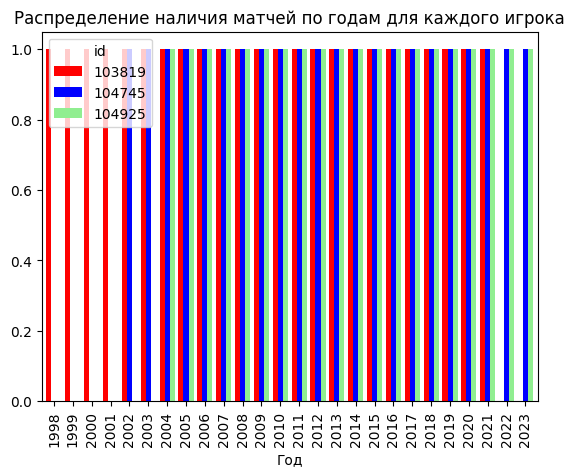

In [31]:
matches_grouped_plot = matches_grouped.groupby(['year', 'id']).size().unstack().plot(kind='bar', stacked=False, width=0.8, color=['red', 'blue', 'lightgreen']);
matches_grouped_plot.set_title('Распределение наличия матчей по годам для каждого игрока');
matches_grouped_plot.set_xlabel('Год');

In [32]:
# выберем года с 2006 по 2019
matches_grouped = matches_grouped[(matches_grouped.index < 2020)&(matches_grouped.index>=2006)]
display(matches_grouped)

,bp_won,id,bp_loss
year,,,
2006,0.718841,103819,0.555556
2007,0.682731,103819,0.559322
2008,0.725118,103819,0.611511
2009,0.760563,103819,0.542056
2010,0.736842,103819,0.563107
2011,0.698718,103819,0.576577
2012,0.744292,103819,0.525000
2013,0.721212,103819,0.594937
2014,0.725962,103819,0.648936


<Figure size 640x480 with 0 Axes>

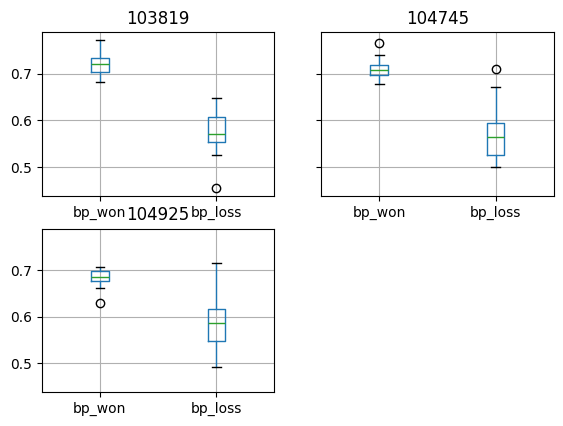

In [33]:
# Строим боксплоты для каждого столбца
plt.figure()
matches_grouped.groupby('id')[['bp_won', 'bp_loss']].boxplot()
plt.show()

Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков?

$Н_0$ - распределения по годам (по победным и по проигранным матчам) независимы для каждого из игроков

$Н_a$ - распределения по годам (по победным и по проигранным матчам) зависимы хотя бы для одного игрока

$alpha = 0.05$

Для решения этого вопроса воспользуемся тестом на независимость из семейства тестов хи-квадрата (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) — это непараметрический, одновыборочный тест, который проверяет наличие связи между двумя переменными.

In [34]:
from scipy.stats import chi2_contingency

H0 = 'Распределения по годам независимы для игрока'
H1 = 'Распределения по годам зависимы для данного игрока'
alpha = 0.05
print(f'Нулевая гипотеза:{H0}')
print(f'Альтернативная гипотеза:{H1}')

for id in ids:
    # вычисляем результат теста
    result1 = chi2_contingency(matches_grouped[matches_grouped['id'] == id].iloc[:, [0, 2]])

    # сравниваем полученное p-value с уровнем значимости
    if (result1.pvalue > alpha):
        print("Для игрока {} принимаем нулевую гипотезу. {}".format(id, H0))

    else:
        print("Для игрока {} отвергаем нулевую гипотезу. Альтернативная гипотеза. H1: {}".format(id, H1))

Нулевая гипотеза:Распределения по годам независимы для игрока
Альтернативная гипотеза:Распределения по годам зависимы для данного игрока
Для игрока 103819 принимаем нулевую гипотезу. Распределения по годам независимы для игрока
Для игрока 104925 принимаем нулевую гипотезу. Распределения по годам независимы для игрока
Для игрока 104745 принимаем нулевую гипотезу. Распределения по годам независимы для игрока


Попарная между игроками независимоть распределений

In [35]:
H0 = 'Распределения по годам независимы для каждой пары игроков'
H1 = 'Распределения по годам зависимы хотя бы для одного игрока'
alpha = 0.05
print(f'Нулевая гипотеза:{H0}')
print(f'Альтернативная гипотеза:{H1}')

# вычисляем результат теста
result1 = chi2_contingency(matches_grouped.iloc[0:14, 0], matches_grouped.iloc[14:28, 0])
result2 = chi2_contingency(matches_grouped.iloc[0:14, 0], matches_grouped.iloc[28:42, 0])
result3 = chi2_contingency(matches_grouped.iloc[28:42, 0], matches_grouped.iloc[14:28, 0])
result4 = chi2_contingency(matches_grouped.iloc[0:14, 2], matches_grouped.iloc[14:28, 2])
result5 = chi2_contingency(matches_grouped.iloc[0:14, 2], matches_grouped.iloc[28:42, 2])
result6 = chi2_contingency(matches_grouped.iloc[28:42, 2], matches_grouped.iloc[14:28, 2])

# сравниваем полученное p-value с уровнем значимости
if (result1.pvalue > alpha) & (result2.pvalue > alpha) & \
    (result3.pvalue > alpha) & (result4.pvalue > alpha) & \
    (result5.pvalue > alpha) & (result6.pvalue > alpha):
    print("Принимаем нулевую гипотезу. {}".format(H0))

else:
    print("Отвергаем нулевую гипотезу.")
    print("Альтернативная гипотеза. H1: {}".format(H1))

Нулевая гипотеза:Распределения по годам независимы для каждой пары игроков
Альтернативная гипотеза:Распределения по годам зависимы хотя бы для одного игрока
Принимаем нулевую гипотезу. Распределения по годам независимы для каждой пары игроков


Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками?
Для сравнения долей выигранных брейк-поинтов между игроками можно использовать тест Краскела-Уоллиса (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal) для независимых выборок.

$Н_0$ - средние доли выигранных брейк-поинтов одинаковы

$Н_a$ - средние доли выигранных брейк-поинтов различны

$alpha = 0.05$


In [36]:
from scipy.stats import kruskal

H0 = 'средние доли выигранных брейк-поинтов одинаковы'
H1 = 'средние доли выигранных брейк-поинтов различны'
alpha = 0.05
print(f'Нулевая гипотеза:{H0}')
print(f'Альтернативная гипотеза:{H1}')

# Попарные сравнения с помощью теста Манна-Уитни с поправкой Бонферрони
for i in range(len(ids)):
    for j in range(i+1, len(ids)):
        player1_data = matches_grouped[matches_grouped['id'] == ids[i]].iloc[:, [0, 2]]
        player2_data = matches_grouped[matches_grouped['id'] == ids[j]].iloc[:, [0, 2]]
        statistic, p_value = kruskal(player1_data.iloc[0], player2_data.iloc[0])
        result = "Отвергаем нулевую гипотезу: средние доли выигранных брейк-поинтов различны." if p_value < 0.05 else "Принимаем нулевую гипотезу: средние доли выигранных брейк-поинтов одинаковы."
        print(f"Сравнение для игроков {ids[i]} и {ids[j]}: {result}")

Нулевая гипотеза:средние доли выигранных брейк-поинтов одинаковы
Альтернативная гипотеза:средние доли выигранных брейк-поинтов различны
Сравнение для игроков 103819 и 104925: Принимаем нулевую гипотезу: средние доли выигранных брейк-поинтов одинаковы.
Сравнение для игроков 103819 и 104745: Принимаем нулевую гипотезу: средние доли выигранных брейк-поинтов одинаковы.
Сравнение для игроков 104925 и 104745: Принимаем нулевую гипотезу: средние доли выигранных брейк-поинтов одинаковы.


**Результат:**

- Распределения по годам (по победным и по проигранным матчам) являются независимыми для каждого из игроков

- Нет значимой разницы в средних долях выигранных брейк-поинтов для проигранных и выигранных матчейпопарно между всеми игроками

## Задача 5:
У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

1. Создайте новый признак, который будет отражать долю выигранных брейк-поинтов для каждого игрока в матче. Доля выигранных брейк-поинтов = bpSaved / bpFaced

2. После этого разделите выборку на две группы: матчи, где игроки выиграли брейк-поинты больше или равно медианы, и матчи, где они выиграли меньше медианы.

3. Составьте таблицу сопряжённости, где строки будут представлять долю выигранных брейк-поинтов (выше/ниже медианы), а столбцы — исход матча (победа/поражение).

In [37]:
df_5 = tennis_df[['tourney_id', 'match_num', 'winner_id', 'loser_id', 'w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced']].dropna()
df_5['bp_won'] = df_5['w_bpSaved']/df_5['w_bpFaced']
df_5['bp_loss'] = df_5['l_bpSaved']/df_5['l_bpFaced']
df_5 = df_5.drop(['w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced'], axis=1).dropna()
display(df_5.sample(5))

# Посчитаем медиану по win_bp
median_bp_won = df_5['bp_won'].median()
median_bp_loss = df_5['bp_loss'].median()
display(round(median_bp_won, 3), round(median_bp_loss, 3))

,tourney_id,match_num,winner_id,loser_id,bp_won,bp_loss
2467,1994-418,7,101482,102201,0.857143,0.333333
194,2013-580,56,104755,103656,0.000000,0.400000
2386,2017-560,213,126094,105676,0.333333,0.375000
2424,2011-560,75,104338,103285,0.750000,0.500000
1715,2010-540,45,104468,104739,0.750000,0.571429


0.667

0.533

In [38]:
# Разделим датасет по выигранным и проигранным матчам
winners_data = (df_5[['tourney_id', 'match_num', 'winner_id', 'bp_won']]
                .rename(columns={'winner_id': 'id', 'bp_won': 'bp'}))
losers_data = (df_5[['tourney_id', 'match_num', 'loser_id', 'bp_loss']]
               .rename(columns={'loser_id': 'id', 'bp_loss': 'bp'}))

# разделим выборку на две группы: матчи, где bp больше или равно медианы (True), и матчи, где bp меньше медианы (False)
winners_data['median_bp'] = winners_data['bp'] >= median_bp_won
losers_data['median_bp'] = losers_data['bp'] >= median_bp_loss

In [39]:
contingency_table = pd.DataFrame(data={'winners_data': winners_data['median_bp'].value_counts().values,
                                       'losers_data': losers_data['median_bp'].value_counts().values,
                                       'median': ['more_median', 'less_median']})
display(contingency_table)

,winners_data,losers_data,median
0,50875,43188,more_median
1,35485,43172,less_median


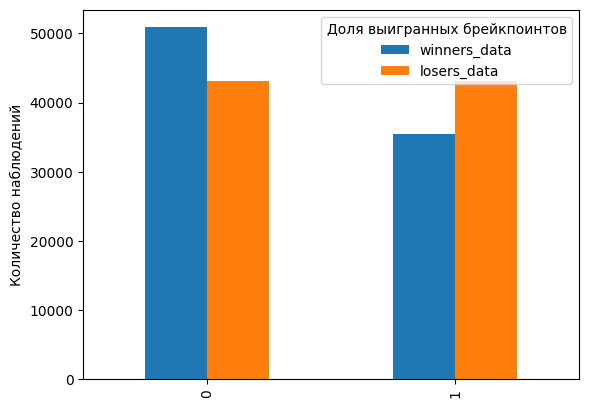

In [40]:
count_of_games = contingency_table.plot(kind='bar')
plt.ylabel('Количество наблюдений')
plt.legend(title='Доля выигранных брейкпоинтов')
plt.show()

In [41]:
normal(winners_data['bp'])
normal(losers_data['bp'])

Тест Д’Агостино p=0.000
Тест Андерсона-Дарлинга p=1811.808 critical_value=0.787
Данные не распределены нормально (мы отвергаем H0)
Тест Д’Агостино p=nan
Тест Андерсона-Дарлинга p=nan critical_value=0.787
Данные не распределены нормально (мы отвергаем H0)


c:\Users\Анна\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1070: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
c:\Users\Анна\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:2121: RuntimeWarning: invalid value encountered in subtract
  w = (y - xbar) / s
c:\Users\Анна\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1498: RuntimeWarning: invalid value encountered in subtract
  x = (asarray(x)-loc) / scale


False

Так как распределение данных отлично от нормального, выберем тест Манна-Уитни, т.к. он является непараметрическим тестом, который не требует нормальности распределения данных. Так же этот тест может использоваться для анализа бинарных данных, таких как количество побед и поражений, что соответствует задаче.

In [42]:
# гипотезы
H0 = 'Соотношения долей брейкпоинтов (больше / меньше медианы) -  в группах 0 и 1 равны'
H1 = 'Доля брейкпоинтов больше медианы -  в группе 0 выше, чем в группе 1'
alpha = 0.05
print(f'Нулевая гипотеза:{H0}')
print(f'Альтернативная гипотеза:{H1}')

more_median_bp_win = [1] * contingency_table.loc[0, 'winners_data'] + [0] * contingency_table.loc[0, 'losers_data']  # 1 для побед, 0 для поражений в more_median
less_median_bp_win = [1] * contingency_table.loc[1, 'winners_data'] + [0] * contingency_table.loc[1, 'losers_data']  # 1 для побед, 0 для поражений в less_median

stat, p = mannwhitneyu(more_median_bp_win, less_median_bp_win, alternative='greater')
# Вывод результатов
print(f'U-статистика: {stat}')
print(f'p-значение: {p}')

# Сравнение p-значения с уровнем значимости
if p < alpha:
    print(f'Отвергаем нулевую гипотезу: {H0} при a = {alpha}.')
    print(f'Принимаем альтернативную гипотезу: {H1} при a = {alpha}.')
else:
    print(f'Не отвергаем нулевую гипотезу: {H0} при a = {alpha}.')

Нулевая гипотеза:Соотношения долей брейкпоинтов (больше / меньше медианы) -  в группах 0 и 1 равны
Альтернативная гипотеза:Доля брейкпоинтов больше медианы -  в группе 0 выше, чем в группе 1
U-статистика: 4031281355.5
p-значение: 3.1095998430468134e-302
Отвергаем нулевую гипотезу: Соотношения долей брейкпоинтов (больше / меньше медианы) -  в группах 0 и 1 равны при a = 0.05.
Принимаем альтернативную гипотезу: Доля брейкпоинтов больше медианы -  в группе 0 выше, чем в группе 1 при a = 0.05.


**Результат:**

доля выигранных брейк-поинтов связана с вероятностью победить в игре